# 13. 프로젝트 : This is your playground! Leaderboard를 정복해 주세요!
자, 이제 여러분이 직접 다양한 하이퍼 파라미터를 튜닝하며 최적의 조합을 찾아볼 차례이다.

여기서 잠깐, 물론 캐글에서의 성적 또는 모델의 성능을 최대화 하기 위한 방법에는 하이퍼 파라미터 튜닝만 있는 것은 절대 아니다.<br>
앞선 과정에서 배웠거나 앞으로 배울 내용에서도 다루듯 모델의 성능을 최적화하는 방법은 매우 많고 지금도 끊임없이 연구되고 있다.

예를 들면 가장 기본적으로는 데이터를 깊게 탐색하는 __EDA__ 과정을 통해 불필요한 피처를 골라내거나 적절하게 피처를 수정하는 등의 피처 엔지니어링을 진행함으로써 데이터를 정제하는 것이 매우 중요하다. 데이터가 무엇이냐에 따라, 그리고 그 데이터를 어떻게 정제하느냐에 따라 모델의 파라미터를 튜닝하는 것만으로는 절대 얻을 수 없는 성능 향상이 이루어질 수 있다.

이렇게 다양한 방법론 중 하이퍼 파라미터 튜닝에 집중해서 모델의 성능을 최대한 끌어올려보지만, 튜닝은 최적화 방법 중 하나일 뿐이라는 것을 잊지 말아야 한다.

### 여기서 사용한 코드들의 해설은 github에 따로 올렸다.

[링크는 요기!!](https://github.com/IsaacTips/AIFFEL/blob/master/Exploration/P9_kaggle/P9_kaggle.ipynb)

### ✓ 튜닝해볼 수 있는 모델 클래스 인자
---
대표적으로 자주 튜닝하는 lightgbm 라이브러리의 인자는 다음과 같다.

* `max_depth` : 의사 결정 나무의 깊이, 정수 사용
* `learning_rate` : 한 스텝에 이동하는 양을 결정하는 파라미터, 보통 0.0001~0.1 사이의 실수 사용
* `n_estimators` : 사용하는 개별 모델의 개수, 보통 50~100 이상의 정수 사용
* `num_leaves` : 하나의 LightGBM 트리가 가질 수 있는 최대 잎의 수
* `boosting_type` : 부스팅 방식, gbdt, rf 등의 문자열 입력

위에서 `n_estimators`와 `max_depth` 에 대해서만 아주 간단하게 실험했지만, 훨씬 더 다양하게 실험을 하며 최적의 조합을 찾아볼 수 있다.
실제로 lightgbm에 넣을 수 있는 인자는 아래 자료들에서 설명하는 것처럼 매우 다양하다.

* [lightGBM / XGBoost 파라미터 설명](http://machinelearningkorea.com/2019/09/29/lightgbm-%ED%8C%8C%EB%9D%BC%EB%AF%B8%ED%84%B0/)
* [Chapter 4. 분류 - LightGBM](https://injo.tistory.com/48)

위의 자료 외에도 `lightgbm`, `xgboost` 하이퍼 파라미터 튜닝 키워드로 검색해보면 다양한 하이퍼 파라미터의 종류를 확인할 수 있다.

실험 과정에서는 물론 위에서 만들었던 `my_GridSearch()`, `save_submission()` 등의 함수를 사용해도 되고, 새로운 함수를 사용해도 된다.

### ✓ 시도해볼 수 있는 방법
---
시도해볼 수 있는 방법은 다음과 같은 것들이 있다.

* 기존에 있는 데이터의 피처를 모델을 보다 잘 표현할 수 있는 형태로 처리하기 (피처 엔지니어링)
* LGBMRegressor, XGBRegressor, RandomForestRegressor 세 가지 이상의 다양한 모델에 대해 하이퍼 파라미터 튜닝하기
* 다양한 하이퍼 파라미터에 대해 그리드 탐색을 시도해서 최적의 조합을 찾아보기
* Baseline 커널에서 활용했던 블렌딩 방법 활용하기

물론 이 외에도 좋은 아이디어가 있다면 당연히 시도해보는 것도 좋다. 자유롭게 여러 가지 방법을 활용해서 점수를 끌어올려 보자.<br>
참고로, 진행하면서 도움이 될 수 있는 가장 좋은 자료는 이미 대회를 진행한 사람들이 올려둔 커널이다.

* [https://www.kaggle.com/c/2019-2nd-ml-month-with-kakr/notebooks](https://www.kaggle.com/c/2019-2nd-ml-month-with-kakr/notebooks)

아주 다양하게 데이터를 탐색해 본 커널도 있고, 상위권을 달성한 커널은 오늘 다루지 않은 스태킹 앙상블(stacking ensemble) 등의 기법을 활용한 커널을 활용하기도 한다. 한 번씩 구경해보고 다른 사람들은 어떤 전략으로 성능을 끌어올렸는지 공부해보는 것도 매우 좋다.


## 필요한 라이브러리 import 하기

In [1]:
import warnings
warnings.filterwarnings("ignore")

import os
from os.path import join

import pandas as pd
import numpy as np

import missingno as msno

from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import KFold, cross_val_score
import xgboost as xgb
import lightgbm as lgb

import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import seaborn as sns

## 데이터 경로 지정하기

In [2]:
data_dir = os.getenv('HOME')+'/AIFFEL/Exploration/E9_kaggle/kaggle-kakr-housing-data/data'

train_data_path = join(data_dir, 'train.csv')
test_data_path = join(data_dir, 'test.csv') 

train = pd.read_csv(train_data_path)
test = pd.read_csv(test_data_path)

## 데이터 불러오기

In [3]:
train.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,0,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,1,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
2,2,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
3,3,20140627T000000,257500.0,3,2.25,1715,6819,2.0,0,0,...,7,1715,0,1995,0,98003,47.3097,-122.327,2238,6819
4,4,20150115T000000,291850.0,3,1.50,1060,9711,1.0,0,0,...,7,1060,0,1963,0,98198,47.4095,-122.315,1650,9711


## 정수형 데이터로 처리하기

In [4]:
train['date'] = train['date'].apply(lambda i: i[:6]).astype(int)
train.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,0,201410,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,1,201502,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
2,2,201502,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
3,3,201406,257500.0,3,2.25,1715,6819,2.0,0,0,...,7,1715,0,1995,0,98003,47.3097,-122.327,2238,6819
4,4,201501,291850.0,3,1.50,1060,9711,1.0,0,0,...,7,1060,0,1963,0,98198,47.4095,-122.315,1650,9711


## `price` 컬럼 삭제하기

In [5]:
y = train['price']
del train['price']

print(train.columns)

Index(['id', 'date', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')


## `id` 컬럼 삭제하기

In [6]:
del train['id']

print(train.columns)

Index(['date', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')


## `test` 데이터에 대해서도 같은 작업하기

단, test맞추어야 할 타겟 데이터인 price는 없으니 훈련 데이터셋과는 다르게 price에 대한 처리는 해주지 않아도 된다.

In [7]:
test['date'] = test['date'].apply(lambda i: i[:6]).astype(int)

del test['id']

print(test.columns)

Index(['date', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')


## 타겟 데이터인 `y` 확인하기.

In [8]:
y

0         221900.0
1         180000.0
2         510000.0
3         257500.0
4         291850.0
           ...    
15030     610685.0
15031    1007500.0
15032     360000.0
15033     400000.0
15034     325000.0
Name: price, Length: 15035, dtype: float64

## 데이터의 분포 확인

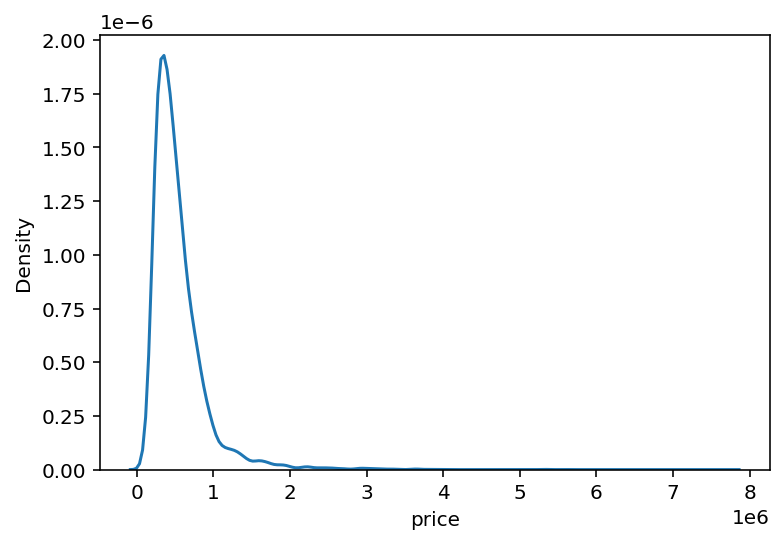

In [9]:
sns.kdeplot(y)
plt.show()

## `np.log1p()` 함수를 통해 로그 변환을 해주기

In [10]:
y = np.log1p(y)
y

0        12.309987
1        12.100718
2        13.142168
3        12.458779
4        12.583999
           ...    
15030    13.322338
15031    13.822984
15032    12.793862
15033    12.899222
15034    12.691584
Name: price, Length: 15035, dtype: float64

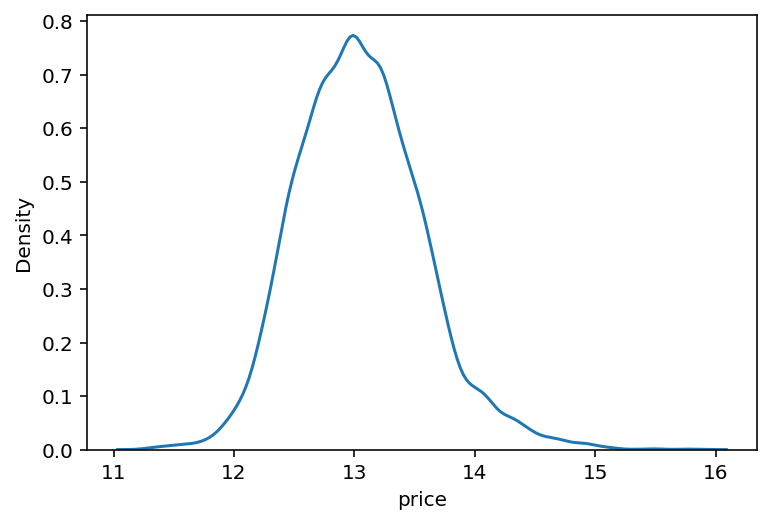

In [11]:
sns.kdeplot(y)
plt.show()

## `info()` 함수로 전체 데이터의 자료형 확인하기

In [12]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15035 entries, 0 to 15034
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           15035 non-null  int64  
 1   bedrooms       15035 non-null  int64  
 2   bathrooms      15035 non-null  float64
 3   sqft_living    15035 non-null  int64  
 4   sqft_lot       15035 non-null  int64  
 5   floors         15035 non-null  float64
 6   waterfront     15035 non-null  int64  
 7   view           15035 non-null  int64  
 8   condition      15035 non-null  int64  
 9   grade          15035 non-null  int64  
 10  sqft_above     15035 non-null  int64  
 11  sqft_basement  15035 non-null  int64  
 12  yr_built       15035 non-null  int64  
 13  yr_renovated   15035 non-null  int64  
 14  zipcode        15035 non-null  int64  
 15  lat            15035 non-null  float64
 16  long           15035 non-null  float64
 17  sqft_living15  15035 non-null  int64  
 18  sqft_l

## RMSE 계산을 위해 필요한 라이브러리 불러오기

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

## RMSE를 계산하기 위해 함수 만들기

In [14]:
def rmse(y_test, y_pred):
    return np.sqrt(mean_squared_error(np.expm1(y_test), np.expm1(y_pred)))

## `XGBRegressor`, `LGBMRegressor`, `GradientBoostingRegressor`, `RandomForestRegressor` 네 가지 모델 가져오기

In [15]:
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor

# random_state는 모델초기화나 데이터셋 구성에 사용되는 랜덤 시드값입니다. 
#random_state=None    # 이게 초기값입니다. 아무것도 지정하지 않고 None을 넘겨주면 모델 내부에서 임의로 선택합니다.  
random_state=2020        # 하지만 우리는 이렇게 고정값을 세팅해 두겠습니다. 

gboost = GradientBoostingRegressor(random_state=random_state)
xgboost = XGBRegressor(random_state=random_state)
lightgbm = LGBMRegressor(random_state=random_state)
rdforest = RandomForestRegressor(random_state=random_state)

models = [gboost, xgboost, lightgbm, rdforest]

## `for`문 안에서 각 모델 별로 학습 및 예측해보기

In [16]:
df = {}

for model in models:
    # 모델 이름 획득
    model_name = model.__class__.__name__

    # train, test 데이터셋 분리 - 여기에도 random_state를 고정합니다. 
    X_train, X_test, y_train, y_test = train_test_split(train, y, random_state=random_state, test_size=0.2)

    # 모델 학습
    model.fit(X_train, y_train)
    
    # 예측
    y_pred = model.predict(X_test)

    # 예측 결과의 rmse값 저장
    df[model_name] = rmse(y_test, y_pred)
    
    # data frame에 저장
    score_df = pd.DataFrame(df, index=['RMSE']).T.sort_values('RMSE', ascending=False)
    
df

{'GradientBoostingRegressor': 128360.19649691365,
 'XGBRegressor': 110318.66956616656,
 'LGBMRegressor': 111920.36735892233,
 'RandomForestRegressor': 125487.07102453562}

## 위의 과정을 `get_scores(models, train, y)` 함수로 만들기

In [17]:
def get_scores(models, train, y):
    df = {}

    for model in models:
        model_name = model.__class__.__name__

        X_train, X_test, y_train, y_test = train_test_split(train, y, random_state=random_state, test_size=0.2)
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

        df[model_name] = rmse(y_test, y_pred)
        score_df = pd.DataFrame(df, index=['RMSE']).T.sort_values('RMSE', ascending=False)

    return score_df

## 그리드 탐색을 위해 필요한 라이브러리 불러오기

In [18]:
from sklearn.model_selection import GridSearchCV

## `LightGBM(lgbm)` 모델 `GridSearchCV` 수행

In [19]:
param_grid = {
    'n_estimators': [50, 100],
    'max_depth': [1, 10],
}

model = LGBMRegressor(random_state=random_state)

grid_model = GridSearchCV(model, param_grid=param_grid, \
                        scoring='neg_mean_squared_error', \
                        cv=5, verbose=1, n_jobs=5)

grid_model.fit(train, y)

Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  20 out of  20 | elapsed:    1.3s finished


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


GridSearchCV(cv=5, estimator=LGBMRegressor(random_state=2020), n_jobs=5,
             param_grid={'max_depth': [1, 10], 'n_estimators': [50, 100]},
             scoring='neg_mean_squared_error', verbose=1)

In [20]:
grid_model.cv_results_

{'mean_fit_time': array([0.07321639, 0.06985197, 0.14121747, 0.19806404]),
 'std_fit_time': array([0.00656098, 0.00319719, 0.01515156, 0.00678542]),
 'mean_score_time': array([0.0049283 , 0.00609822, 0.00869622, 0.01437693]),
 'std_score_time': array([0.00048823, 0.00036022, 0.00034558, 0.00121671]),
 'param_max_depth': masked_array(data=[1, 1, 10, 10],
              mask=[False, False, False, False],
        fill_value='?',
             dtype=object),
 'param_n_estimators': masked_array(data=[50, 100, 50, 100],
              mask=[False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'max_depth': 1, 'n_estimators': 50},
  {'max_depth': 1, 'n_estimators': 100},
  {'max_depth': 10, 'n_estimators': 50},
  {'max_depth': 10, 'n_estimators': 100}],
 'split0_test_score': array([-0.0756974 , -0.05555652, -0.02885847, -0.02665428]),
 'split1_test_score': array([-0.07666447, -0.057876  , -0.03041465, -0.02795896]),
 'split2_test_score': array([-0.07354904

In [21]:
params = grid_model.cv_results_['params']
params

[{'max_depth': 1, 'n_estimators': 50},
 {'max_depth': 1, 'n_estimators': 100},
 {'max_depth': 10, 'n_estimators': 50},
 {'max_depth': 10, 'n_estimators': 100}]

In [22]:
score = grid_model.cv_results_['mean_test_score']
score

array([-0.07339447, -0.05502043, -0.02917734, -0.02702714])

In [23]:
results = pd.DataFrame(params)
results['score'] = score

results

,max_depth,n_estimators,score
0,1,50,-0.073394
1,1,100,-0.055020
2,10,50,-0.029177
3,10,100,-0.027027


In [24]:
results['RMSE'] = np.sqrt(-1 * results['score'])
results

,max_depth,n_estimators,score,RMSE
0,1,50,-0.073394,0.270914
1,1,100,-0.055020,0.234564
2,10,50,-0.029177,0.170814
3,10,100,-0.027027,0.164399


In [25]:
results = results.rename(columns={'RMSE': 'RMSLE'})
results

,max_depth,n_estimators,score,RMSLE
0,1,50,-0.073394,0.270914
1,1,100,-0.055020,0.234564
2,10,50,-0.029177,0.170814
3,10,100,-0.027027,0.164399


In [26]:
results = results.sort_values('RMSLE')
results

,max_depth,n_estimators,score,RMSLE
3,10,100,-0.027027,0.164399
2,10,50,-0.029177,0.170814
1,1,100,-0.055020,0.234564
0,1,50,-0.073394,0.270914


`max_depth` = 10, `n_setimators` = 100 으로 설정할 때, RMSLE값이 가장 낮다는 것을 알 수 있다.


## 위 과정을 하나의 함수로 만들자

In [27]:
# 다음과 같은 과정을 진행할 수 있는 `my_GridSearch(model, train, y, param_grid, verbose=2, n_jobs=5)` 함수를 구현해 보세요.

# 1. GridSearchCV 모델로 `model`을 초기화합니다.
# 2. 모델을 fitting 합니다.
# 3. params, score에 각 조합에 대한 결과를 저장합니다. 
# 4. 데이터 프레임을 생성하고, RMSLE 값을 추가한 후 점수가 높은 순서로 정렬한 `results`를 반환합니다.


def my_GridSearch(model, train, y, param_grid, verbose=2, n_jobs=5):
    # GridSearchCV 모델로 초기화
    grid_model = GridSearchCV(model, param_grid=param_grid, scoring='neg_mean_squared_error', \
                              cv=5, verbose=verbose, n_jobs=n_jobs)

    # 모델 fitting
    grid_model.fit(train, y)

    # 결과값 저장
    params = grid_model.cv_results_['params']
    score = grid_model.cv_results_['mean_test_score']

    # 데이터 프레임 생성
    results = pd.DataFrame(params)
    results['score'] = score

    # RMSLE 값 계산 후 정렬
    results['RMSLE'] = np.sqrt(-1 * results['score'])
    results = results.sort_values('RMSLE')

    return results

## `LGBMRegressor` 모델 `GridSearchCV` 수행

하이퍼파라미터 튜닝은 [LIGHTGBM 이란? 그리고 PARAMETER 튜닝하기](https://nurilee.com/2020/04/03/lightgbm-definition-parameter-tuning/)를 참조했다.

In [28]:
param_grid = {
    'max_depth': [1, 10, 20], # 블로그에서 찾은 파라미터
    'learning_rate' : [0.1, 0.001, 0.003], # 블로그에서 찾은 파라미터
    'num_iterations' : [1000, 2000, 3000], # 해커톤때 사용한 파라미터
    'feature_fraction': [0.7, 0.8, 0.9], # 해커톤때 사용한 파라미터
    'boosting' : ['rf', 'gbdt', 'dart', 'goss'] # 블로그에서 찾은 파라미터
}

lightgbm = LGBMRegressor(random_state=random_state)
my_GridSearch(lightgbm, train, y, param_grid, verbose=2, n_jobs=5)

Fitting 5 folds for each of 324 candidates, totalling 1620 fits


[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  78 tasks      | elapsed:    0.8s
[Parallel(n_jobs=5)]: Done 577 tasks      | elapsed:  1.5min
[Parallel(n_jobs=5)]: Done 780 tasks      | elapsed:  3.4min
[Parallel(n_jobs=5)]: Done 1063 tasks      | elapsed: 28.6min
[Parallel(n_jobs=5)]: Done 1428 tasks      | elapsed: 46.6min
[Parallel(n_jobs=5)]: Done 1620 out of 1620 | elapsed: 49.0min finished


,boosting,feature_fraction,learning_rate,max_depth,num_iterations,score,RMSLE
296,goss,0.8,0.003,20,3000,-0.026160,0.161740
293,goss,0.8,0.003,10,3000,-0.026189,0.161831
323,goss,0.9,0.003,20,3000,-0.026221,0.161930
269,goss,0.7,0.003,20,3000,-0.026230,0.161956
320,goss,0.9,0.003,10,3000,-0.026235,0.161974
...,...,...,...,...,...,...,...
76,rf,0.9,0.003,10,2000,NaN,NaN
77,rf,0.9,0.003,10,3000,NaN,NaN
78,rf,0.9,0.003,20,1000,NaN,NaN
79,rf,0.9,0.003,20,2000,NaN,NaN


`LGBMRegressor` 모델의 최적 파라미터
* boosting = "goss"
* feature_fraction = 0.8
* learning_rate = 0.003
* max_depth = 20
* num_iterations = 3000

## `XGBRegressor` 모델 `GridSearchCV` 수행

하이퍼파라미터 튜닝은 [Complete Guide to Parameter Tuning in XGBoost with codes in Python](https://www.analyticsvidhya.com/blog/2016/03/complete-guide-parameter-tuning-xgboost-with-codes-python/)을 참조했다.

In [29]:
param_grid = {
    'learning_rate': [0.1, 0.001, 0.003], # 블로그에서 찾은 파라미터
    'max_depth': [5, 10], # 블로그에서 찾은 파라미터
    'gamma': [0, 0.05, 0.5], # 블로그에서 찾은 파라미터
    'min_child_weight' : [1, 3, 5], # 블로그에서 찾은 파라미터
    'colsample_bytree' : [0.5, 1.0], # 블로그에서 찾은 파라미터
}

xgboost = XGBRegressor(random_state=random_state)
my_GridSearch(xgboost, train, y, param_grid, verbose=2, n_jobs=5)


Fitting 5 folds for each of 108 candidates, totalling 540 fits


[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  31 tasks      | elapsed:   26.9s
[Parallel(n_jobs=5)]: Done 152 tasks      | elapsed:  1.3min
[Parallel(n_jobs=5)]: Done 355 tasks      | elapsed:  3.2min
[Parallel(n_jobs=5)]: Done 540 out of 540 | elapsed:  5.3min finished


,colsample_bytree,gamma,learning_rate,max_depth,min_child_weight,score,RMSLE
23,0.5,0.05,0.100,10,5,-0.025968,0.161145
21,0.5,0.05,0.100,10,1,-0.026181,0.161806
22,0.5,0.05,0.100,10,3,-0.026184,0.161816
4,0.5,0.00,0.100,10,3,-0.026209,0.161891
5,0.5,0.00,0.100,10,5,-0.026255,0.162034
...,...,...,...,...,...,...,...
8,0.5,0.00,0.001,5,5,-129.162226,11.364956
7,0.5,0.00,0.001,5,3,-129.162226,11.364956
6,0.5,0.00,0.001,5,1,-129.162226,11.364956
24,0.5,0.05,0.001,5,1,-129.162226,11.364956


`XGBRegressor` 모델의 최적 파라미터

* colsample_bytree = 0.5
* gamma = 0.05
* learning_rate = 0.100
* max_depth = 10
* min_child_weight = 5

## `GradientBoostingRegressor` 모델 `GridSearchCV` 수행

하이퍼파라미터 튜닝은 [sklearn.ensemble.GradientBoostingRegressor](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingRegressor.html)을 참조했다.

In [30]:
param_grid = {
    'n_estimators': [1000, 2000, 3000],
    'max_depth': [5, 10],
    'learning_rate' : [0.1, 0.001, 0.003],
    'max_features': ["Log2", "sqrt", None] # 홈페이지서 찾은 파라미터
}
model = GradientBoostingRegressor(random_state=random_state)
my_GridSearch(model, train, y, param_grid, verbose=2, n_jobs=5)

Fitting 5 folds for each of 54 candidates, totalling 270 fits


[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  65 tasks      | elapsed:  5.8min
[Parallel(n_jobs=5)]: Done 192 tasks      | elapsed: 27.3min
[Parallel(n_jobs=5)]: Done 270 out of 270 | elapsed: 41.1min finished


,learning_rate,max_depth,max_features,n_estimators,score,RMSLE
3,0.100,5,sqrt,1000,-0.026979,0.164254
6,0.100,5,None,1000,-0.027061,0.164503
50,0.003,10,sqrt,3000,-0.027223,0.164992
4,0.100,5,sqrt,2000,-0.027419,0.165587
7,0.100,5,None,2000,-0.027586,0.166092
5,0.100,5,sqrt,3000,-0.027659,0.166310
49,0.003,10,sqrt,2000,-0.027823,0.166804
8,0.100,5,None,3000,-0.027855,0.166897
44,0.003,5,None,3000,-0.028886,0.169960
12,0.100,10,sqrt,1000,-0.029036,0.170399


`GradientBoostingRegressor` 모델의 최적 파라미터

* learning_rate = 0.1
* max_depth = 5
* max_features = "sqrt"
* n_estimators = 1000

## `RandomForestRegressor` 모델은 스킵
3개 모델 했는데, 시간이 너무 오래걸려서 `RandomForestRegressor` 는 스킵했다.

## 모델 전부 학습시키기

lightgbm의 RMSE값이 다른 것들 보다 높아서 제외시켰다.<br>
(3개로 ensemble을 적용했더니, Public score는 낮게 나오는데 Private score가 110000아래로 안내려갔다. 그래서 높은 갚을 가진 모델을 제외시켜서 emsemble을 적용시켰다.)

In [55]:
# lightgbm = LGBMRegressor(boosting = "goss", feature_fraction=0.8, learning_rate = 0.003, max_depth = 20, num_iterations = 3000, random_state=random_state)
xgboost = XGBRegressor(colsample_bytree = 0.5, gamma = 0.05, learning_rate = 0.1, max_depth = 10, min_child_weight = 5, random_state=random_state)
gboost = GradientBoostingRegressor(learning_rate = 0.1, max_depth = 5, max_features = "sqrt", n_estimators = 1000, random_state=random_state)

models = [xgboost, gboost]

get_scores(models, train, y)

,RMSE
GradientBoostingRegressor,109243.309108
XGBRegressor,105917.918628


## 앙상블 적용

In [57]:
models = [{'model':xgboost, 'name':'XGBoost'},
          {'model':gboost, 'name':'GradientBoosting'}]

def AveragingBlending(models, train, y, sub_x):
    for m in models : 
        m['model'].fit(train, y)
    
    predictions = np.column_stack([
        m['model'].predict(test) for m in models
    ])
    return np.mean(predictions, axis=1)

prediction = AveragingBlending(models, train, y, test)
print(len(prediction))
prediction

6468


array([13.18081259, 13.03536257, 14.16897058, ..., 13.10439888,
       12.69287968, 12.99511166])

## `np.expm1` 적용

In [58]:
prediction = np.expm1(prediction)
prediction

array([ 530094.57149502,  458337.17849903, 1423985.06170522, ...,
        491096.95330108,  325421.52117203,  440255.00244986])

## `save_submission`함수로 예측 결과 저장하기

In [59]:
def save_submission(prediction, model_name, rmsle=None):
    data_dir = os.getenv('HOME')+'/AIFFEL/Exploration/E9_kaggle/kaggle-kakr-housing-data/data'
    submission_path = join(data_dir, 'sample_submission.csv')
    submission = pd.read_csv(submission_path)
    submission['price'] = prediction
    submission_csv_path = '{}/submission_{}_RMSLE_{}.csv'.format(data_dir, model_name, rmsle)
    submission.to_csv(submission_csv_path, index=False)
    print('{} saved!'.format(submission_csv_path))

In [60]:
save_submission(prediction, 'ensemble6', rmsle=None)

/home/aiffel-dj10/AIFFEL/Exploration/E9_kaggle/kaggle-kakr-housing-data/data/submission_ensemble6_RMSLE_None.csv saved!


## 캐글에 결과 제출
저장된 csv파일을 캐글에 제출한다.

<img src="./real_final.jpg" alt="Final" />

<img src="./real_history.jpg" alt="History" />

## 루브릭
---
* 캐글 데이터분석 전과정이 성공적으로 진행되었는가?<br>
(데이터 전처리, 모델학습, 예측의 전체 과정을 거쳐 캐글 submission까지 진행되었다.)

    * __데이터 전처리, 모델학습, 예측의 전체 과정을 거쳐 캐글 submission까지 정확하게 진행되었다. 좀 더 자세한 코드 설명은 Practice 파일에 넣어놓았다. 위에 링크 있음.__

* 전처리, 학습과정 및 결과에 대한 설명이 시각화를 포함하여 체계적으로 진행되었는가?<br>
(_제출된 노트북이 캐글 커널로 사용될 수 있을 만큼 전처리, 학습, 최적화 진행 과정이 체계적으로 기술되었다._)
    
    * __캐글 커널로 사용될만 하다.__

* 회귀모델 예측정확도가 기준 이상 높게 나왔는가?<br>
(_다양한 피처 엔지니어링과 하이퍼 파라미터 튜닝 등의 최적화 기법을 통해 캐글 리더보드의 Private score 기준 110000 이하의 점수를 얻었다._)
    
    * __후... 110000점 이하의 점수를 만들기가 너무 힘들었다. Public score는 110000 이하의 점수가 나왔는데, Private score가 자꾸 110000 이상이 나와서 곤혹을 겪었다. 겨우겨우 LGBMRegressor 모델을 앙상블 기법에서 뺐더니 Private score가 110000 이하의 점수로 나왔다.__

## 회고
---
1. 일단 하이퍼파라미터 변경, 데이터 전처리의 중요성을 느꼈다. 아무래도 해커톤에서 해봤던 제출 방식이라, 제출까지는 쉬웠다.
2. 학습 모델에 대한 블로그나 홈페이지에 하이퍼파라미터의 설명과 추천 방식들을 찾아서 적용시켰다.
3. Public score가 110000 이하의 점수가 나오고, 마무리로 루브릭 쓰는데, 스코어 기준이 Private score 인것을 깨닫고 그리드 서치부터 다시 진행했다. 앙상블에서 LGBMRegressor 모델(RMSE값이 다른 모델들보다 높았음)을 제외하고 모델을 돌려보니, Private score 기준으로 109477점이 나왔다.

## 질문
---
1. 왜 기준이 Private score일까?